# Pandas Practice 2

![IRIS, https://github.com/simonava5/fishers-iris-data](./images/iris.png)

After the notebook with a lot of new input, let's start applying it totally by yourselves. 
For this purpose we will use one of the most standard real-life datasets: Its called Iris Dataset, and is all about the plant iris. Let's learn a little bit more about the dataset by looking at it. 

## Learning Objectives





By the end of this notebook, you will feel more comfortable with your newly acquired knowledge, as you will see that you can

- load data from csv files into DataFrames
- access data stored in DataFrames
- use the general functions of a DataFrame to answer questions about the data
- create insightful plots using the pandas function `.plot()`
- explain what conclusions you draw from these visualizations.


In [39]:
# import pandas
import pandas as pd

In [40]:
# load the data
df = pd.read_csv('data/iris.csv')

Let us first have a look at the head of the table, maybe also on the last 10 rows...

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


How many irises are in the data set?

In [43]:
df.shape

(150, 5)

How many different species are there?

In [44]:
df['species'].nunique()

3

Calculate the mean, median, mode for petal length

In [45]:
df['petal_length'].agg({'mean', 'median', lambda x: x.mode()[0]})

median      4.350000
<lambda>    1.500000
mean        3.758667
Name: petal_length, dtype: float64

What can you conclude about the distribution for petal length?

What is the smallest and largest value for petal length?

In [46]:
df['petal_length'].min()

np.float64(1.0)

In [47]:
df['petal_length'].max()

np.float64(6.9)

Calculate the variance and standard deviation for petal length

In [48]:
df['petal_length'].agg(['std', 'var'])
# I can give new names to aggregations using dic
df['petal_length'].agg({'std_pl': 'std', 'var_pl': 'var'})

std_pl    1.764420
var_pl    3.113179
Name: petal_length, dtype: float64

Calculate the basic descriptive statistics for all columns of the iris data set with a single command.

In [49]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


What is the overall average for sepal length?

In [50]:
df['sepal_length'].mean()

np.float64(5.843333333333334)

Use the DataFrame grouping function to determine the count by species.

In [54]:
df.groupby('species').size().reset_index(name='count')

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


Use the DataFrame grouping function to determine the average length and width of sepals and pedals by species.

In [57]:
df.groupby('species')[['sepal_length', 'sepal_width']].mean()

,sepal_length,sepal_width
species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


Add the sum of the sepal width and length as a new column to your DataFrame.

In [58]:
df['sepal_sum'] = df['sepal_length']+df['sepal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_sum
0,5.1,3.5,1.4,0.2,Iris-setosa,8.6
1,4.9,3.0,1.4,0.2,Iris-setosa,7.9
2,4.7,3.2,1.3,0.2,Iris-setosa,7.9
3,4.6,3.1,1.5,0.2,Iris-setosa,7.7
4,5.0,3.6,1.4,0.2,Iris-setosa,8.6


Visualize petal length with a histogram

<Axes: ylabel='Frequency'>

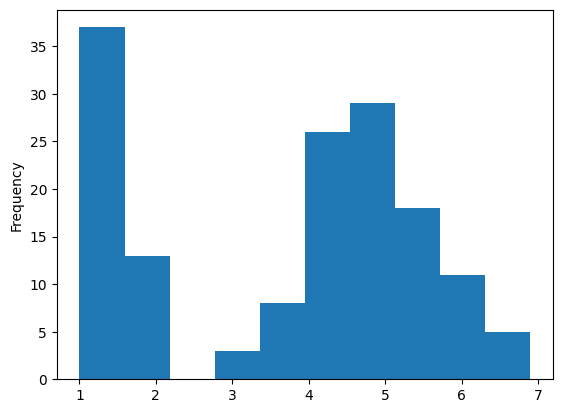

In [59]:
df['petal_length'].plot(kind='hist')

Describe the distribution

Which is more informative: the summary statistics or visualizations?

Visualize petal length and width with a "scatter_matrix"

<Axes: xlabel='petal_length', ylabel='petal_width'>

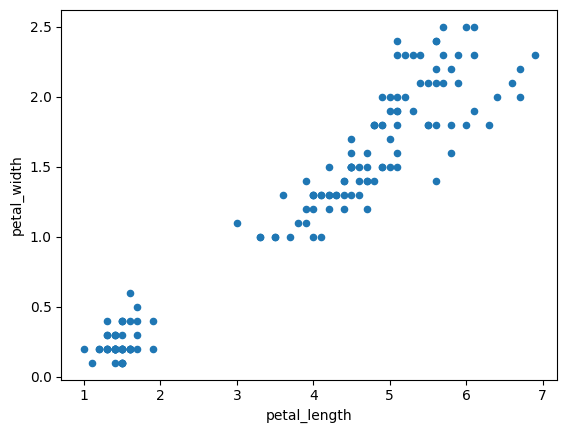

In [61]:
df.plot(kind='scatter', x='petal_length', y='petal_width')

Create a new column with a rough estimate of petal area by multiplying petal length and width together.

In [73]:
df['petal_area'] = df['petal_length']*df['petal_width']
#df.drop(['sepal_area'], axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_sum,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,8.6,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,7.9,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,7.9,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,7.7,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,8.6,0.28


Create a new DataFrame with petal areas greater than $1cm^2$.

In [ ]:
df_new = df[(df['petal_area']>1.0)]

sepal_length               7.9
sepal_width                3.8
petal_length               6.9
petal_width                2.5
species         Iris-virginica
sepal_sum                 11.7
petal_area               15.87
dtype: object

Create 3 new DataFrames, one for each species. Use the entire dataset.

In [100]:
# Get species in list automatically
species_list = list(df.groupby('species').groups.keys())
print(species_list)
# Create the 3 species dataframes
df_setosa = df[(df['species']==species_list[0])]
df_setosa.head()
# Loop through each species and create new dataframe for each species


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_sum,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,8.6,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,7.9,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,7.9,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,7.7,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,8.6,0.28
